## Ensemble Learning

**Introduction**

Ensembling in machine learning involves combining multiple individual models to create a more robust and accurate predictor than any single model. This technique can be implemented in various ways, such as bagging, boosting, or stacking, using diverse or similar algorithms to create an ensemble model.

**Algorithm**

Ensemble algorithms work by training multiple models and combining their predictions to produce a final output. Some popular ensemble methods include:


1.   Bagging (Bootstrap Aggregating): Uses bootstrap samples to train multiple models and averages their predictions.
2.   Boosting: Trains models sequentially, focusing on instances that previous models misclassified to improve performance.
3. Stacking: Combines predictions of multiple models using a meta-learner that learns to weigh their outputs optimally.

**Advantages**



1.   Enhanced Predictive Performance: Ensembles often deliver higher accuracy compared to individual models.
2.   Robustness: By combining different models, ensembles can mitigate the weaknesses of individual models.
3. Versatility: Works well across various machine learning tasks and data types.

**Disadvantages**



1.   Complexity: Ensembles can be more challenging to interpret and might require more computational resources.
2.   Overfitting: If not managed properly, ensembles can overfit the training data.
3. Increased Computation Time: Training multiple models and combining their predictions can be time-consuming.

ML-Ensemble, a library, uses Scikit-learn's high-level API and computational graph frameworks to build ensemble networks efficiently. It enables memory-efficient and parallelized ensembling while offering flexibility in model combination and concurrency methods.







In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/sample_data/advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Data Analysis

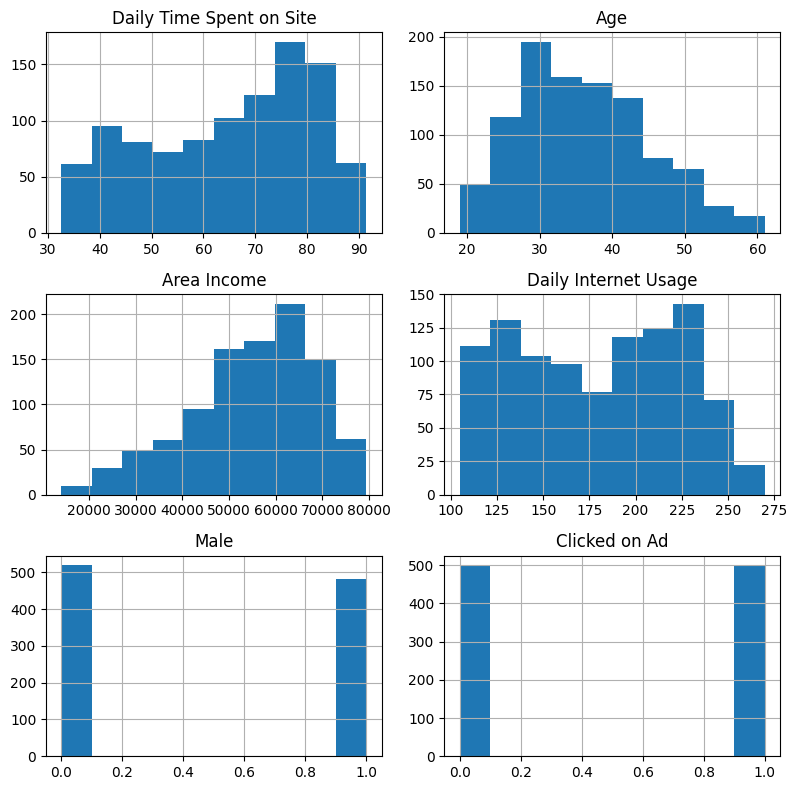

In [4]:
# Visualize the distributions of features using histograms to understand their spread.

# Display histograms for the dataset's features
data.hist(figsize=(8, 8))  # Set the figure size for better visualization
plt.tight_layout()  # Adjust layout for better presentation
plt.show()  # Display the histograms


<ipython-input-5-88e854901325>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], bins=30, kde=True, hist_kws=dict(edgecolor="black", linewidth=1))


<Axes: xlabel='Age', ylabel='Density'>

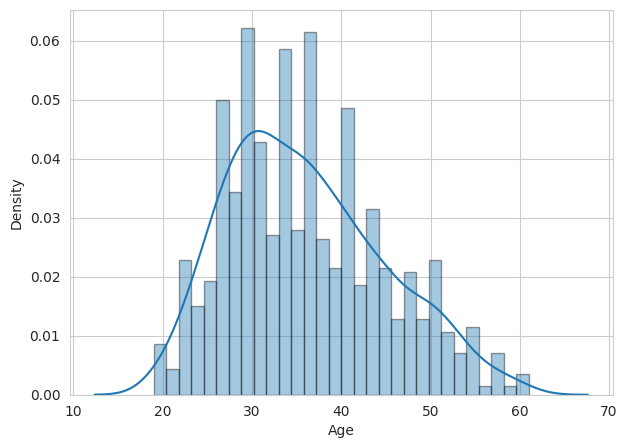

In [5]:
# Create a figure with specified dimensions
plt.figure(figsize=(7, 5))

# Set the style of the seaborn plot to 'whitegrid'
sns.set_style('whitegrid')

# Plot a distribution plot (histogram and kernel density estimate) for the 'Age' column in the dataset
sns.distplot(data['Age'], bins=30, kde=True, hist_kws=dict(edgecolor="black", linewidth=1))


In [6]:
data.isnull().count()


Daily Time Spent on Site    1000
Age                         1000
Area Income                 1000
Daily Internet Usage        1000
Ad Topic Line               1000
City                        1000
Male                        1000
Country                     1000
Timestamp                   1000
Clicked on Ad               1000
dtype: int64

In [7]:
# Get number of missing values in each column
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [8]:
data.duplicated().sum()

0

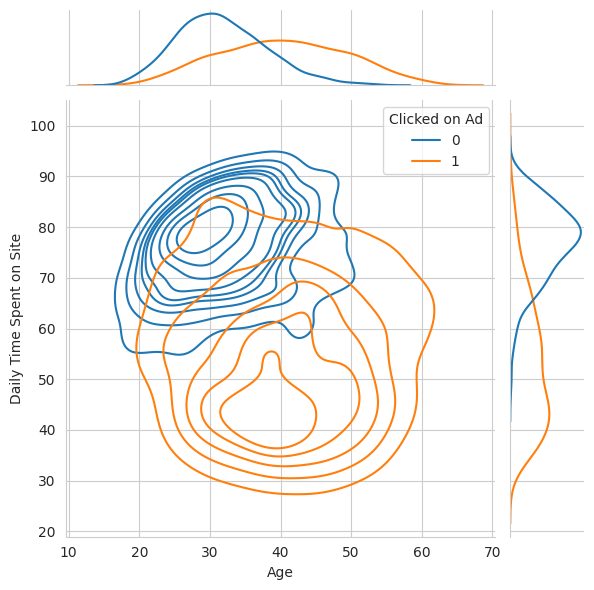

In [9]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data= data, hue='Clicked on Ad',kind='kde')

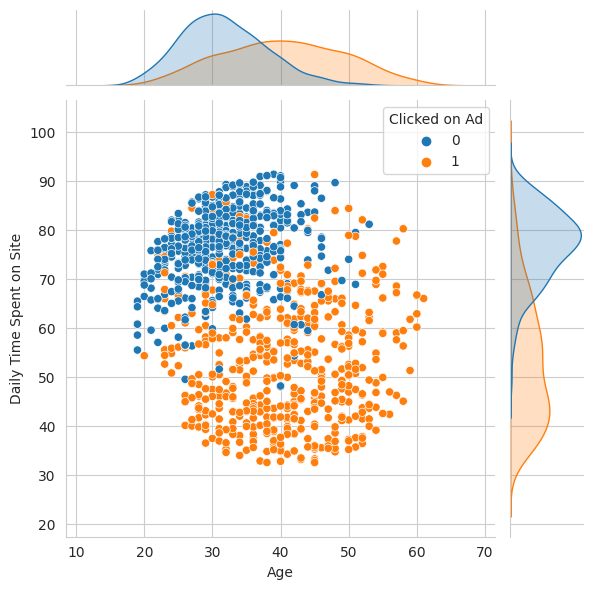

In [10]:
sns.jointplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = data)

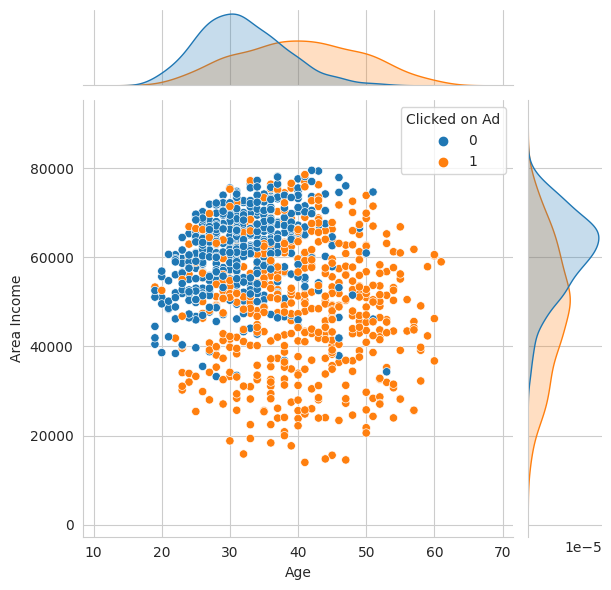

In [11]:
sns.jointplot(x='Age',y='Area Income',data=data,hue='Clicked on Ad')

Text(0.5, 0, 'Male=1, Female=0')

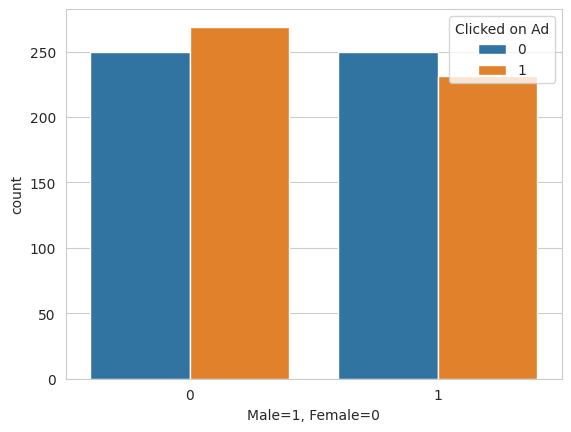

In [12]:

sns.countplot(x='Male', hue='Clicked on Ad', data=data)
plt.xlabel('Male=1, Female=0')





There are distinct patterns observed in the advertisement clicks:

- Individuals above 40 years old exhibit higher click rates.
- Those under 40 years old and spending less time on the site also tend to click more on the advertisement.

<Figure size 1000x1000 with 0 Axes>

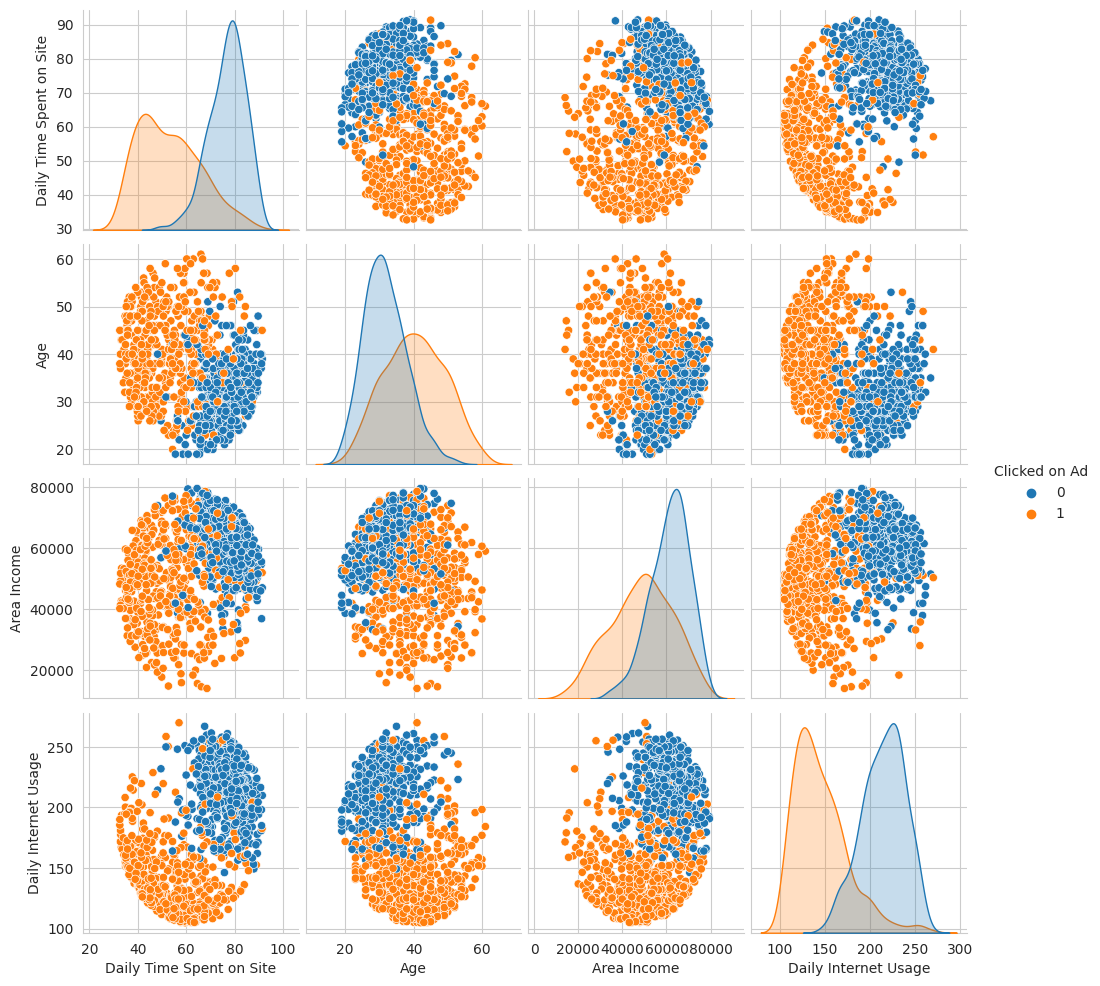

In [13]:
# Create a pairplot to explore relationships between multiple variables, coloring points by 'Clicked on Ad'
plt.figure(figsize=(10, 10))
sns.pairplot(
    data,
    hue='Clicked on Ad',  # Color points based on 'Clicked on Ad'
    vars=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],  # Selecting specific variables
    diag_kind='kde',  # Use kernel density estimation for diagonal subplots
)
plt.show()


<ipython-input-14-20c4c9ff58f8>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


<Axes: >

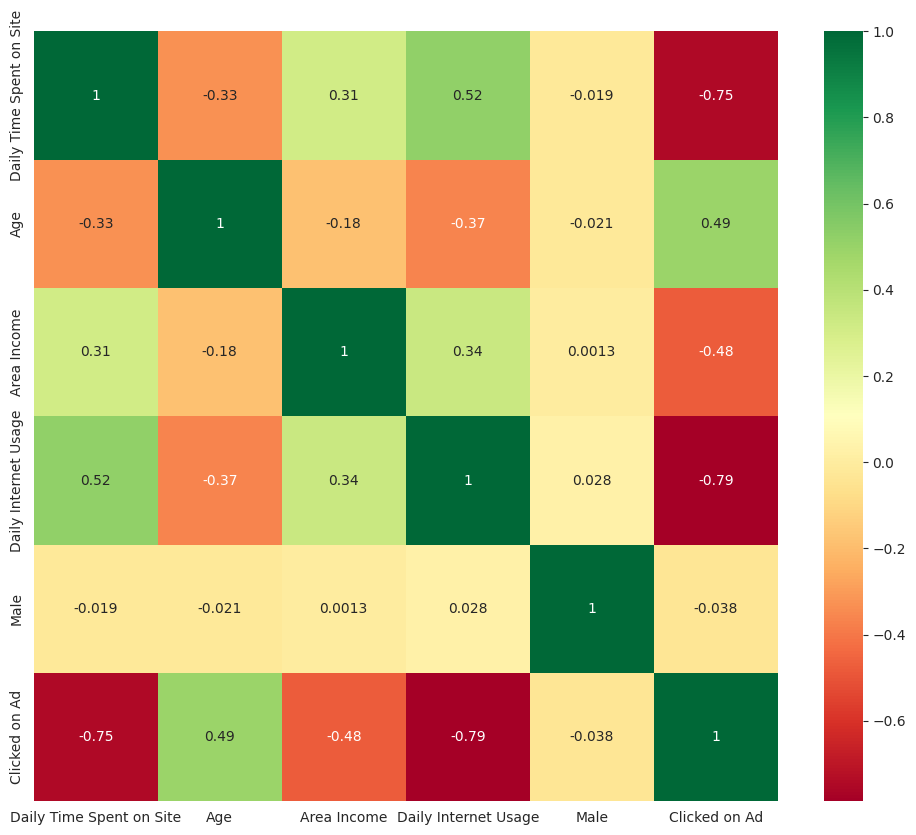

In [14]:
# Creating a heatmap to visualize the correlation between different numerical features in the dataset
fig = plt.figure(figsize=(12, 10))

# Using seaborn's heatmap function to display correlations
# annot=True adds correlation values to the cells, cmap specifies the color palette
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


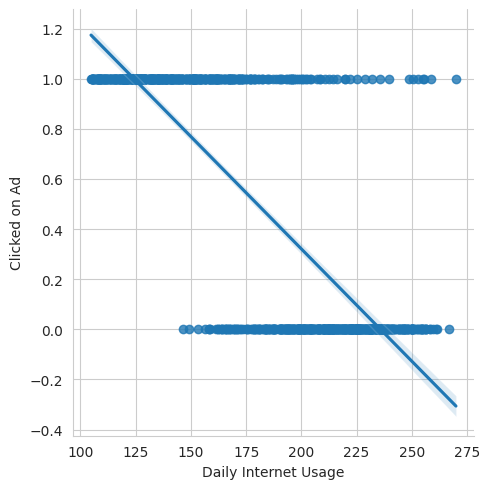

In [15]:
# Creating a scatter plot using Seaborn's lmplot to visualize the relationship between "Daily Internet Usage" and "Clicked on Ad"
# x-axis represents "Daily Internet Usage", y-axis represents "Clicked on Ad"
sns.lmplot(x="Daily Internet Usage", y="Clicked on Ad", data=data)


## Multivariable Logistic Regression

In [16]:
# Import necessary libraries and modules for the machine learning models
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import confusion_matrix  # For evaluating confusion matrices
from sklearn import metrics  # For various metrics for model evaluation
from sklearn.metrics import classification_report  # For generating classification reports
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV  # For logistic regression models
from sklearn.ensemble import RandomForestClassifier  # For random forest classifier
from sklearn.neighbors import KNeighborsClassifier  # For K-nearest neighbors classifier
from sklearn.neural_network import MLPClassifier  # For multi-layer perceptron classifier
from sklearn.ensemble import VotingClassifier  # For ensemble voting classifier
from sklearn.tree import DecisionTreeClassifier  # For decision tree classifier


In [19]:
# Define the features (X) and the target variable (y)
X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]  # Features
y = data['Clicked on Ad']  # Target variable
X


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35,61833.90,256.09
1,80.23,31,68441.85,193.77
2,69.47,26,59785.94,236.50
3,74.15,29,54806.18,245.89
4,68.37,35,73889.99,225.58
...,...,...,...,...
995,72.97,30,71384.57,208.58
996,51.30,45,67782.17,134.42
997,51.63,51,42415.72,120.37
998,55.55,19,41920.79,187.95


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

## Train-Test Split Data

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate a Logistic Regression model
logistic = LogisticRegression()

# Fit the Logistic Regression model with the training data
logistic.fit(X_train, y_train)

# Display the accuracy of the model on the training set
print("Train - Accuracy:", metrics.accuracy_score(y_train, logistic.predict(X_train)))


Train - Accuracy: 0.9


## Test & Evaluations

Text(0.5, 1.0, 'Confusion matrix for Logistic Regression')

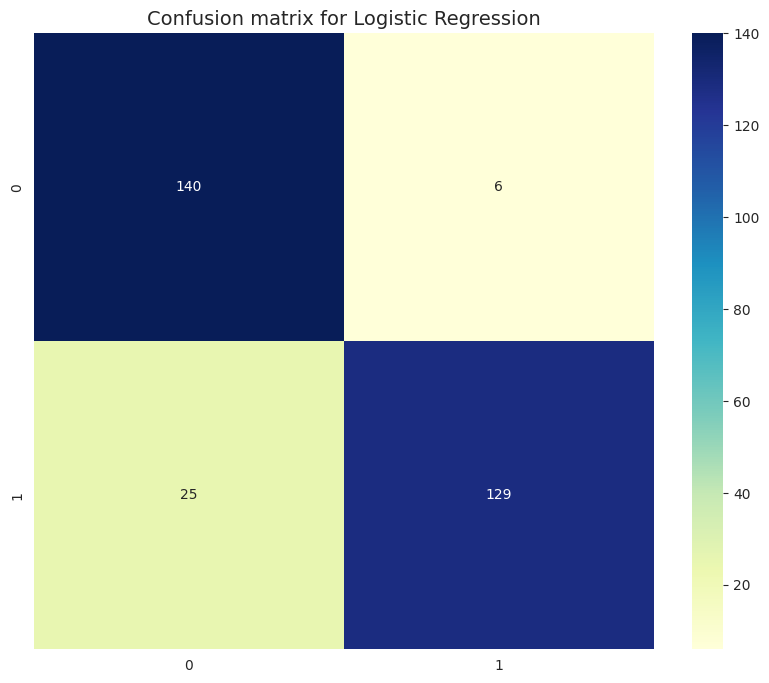

In [22]:
# Use the trained Logistic Regression model to predict on the test set
y_pred = logistic.predict(X_test)

# Create a Confusion Matrix for the Logistic Regression predictions
fig = plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu")
plt.title('Confusion matrix for Logistic Regression', fontsize=14)


## Classification Report for the model

In [23]:
cr = classification_report(y_test, y_pred,target_names=['Not Clicked','Clicked'])
print(cr)

              precision    recall  f1-score   support

 Not Clicked       0.85      0.96      0.90       146
     Clicked       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



## ROC Curve

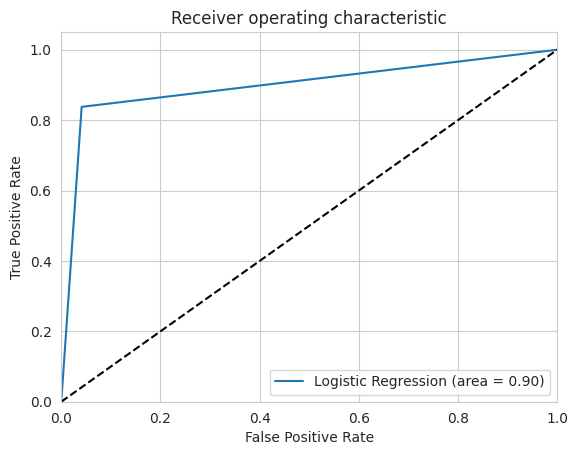

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Random Forest Classifier

In [26]:
# Instantiate and fit a RandomForestClassifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

Train - Accuracy: 1.0


Text(0.5, 1.0, 'Confusion matrix for Random Forest')

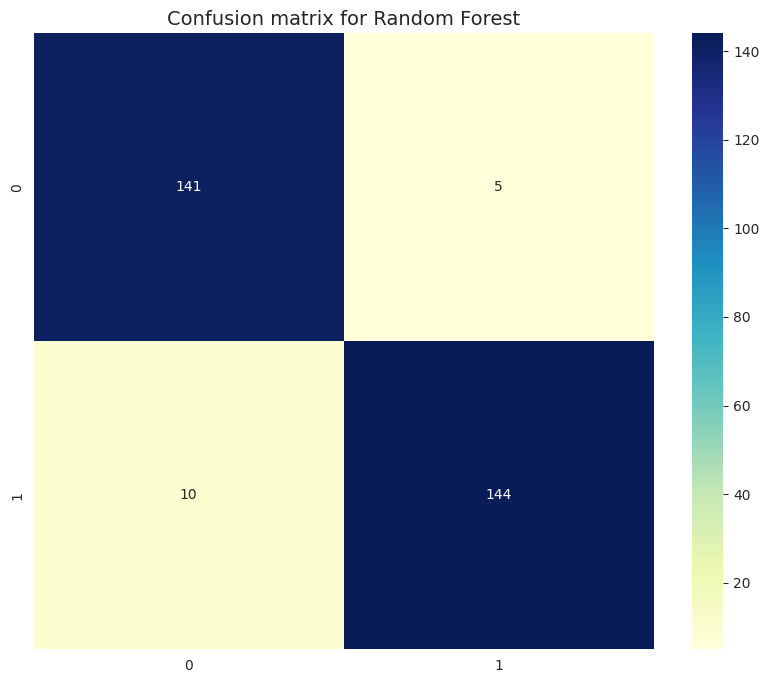

In [27]:
# Print the accuracy of the RandomForestClassifier on the training set
print("Train - Accuracy:", metrics.accuracy_score(y_train, rf.predict(X_train)))

# Predict on the test set using the trained RandomForestClassifier
y_pred_rf = rf.predict(X_test)

# Create a confusion matrix for the RandomForestClassifier predictions
fig = plt.figure(figsize=(10, 8))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='g', cmap="YlGnBu")
plt.title('Confusion matrix for Random Forest', fontsize=14)


In [28]:
# Generate and print the classification report for RandomForestClassifier predictions
cr_rf = classification_report(y_test, y_pred_rf, target_names=['Not Clicked', 'Clicked'])
print(cr_rf)


              precision    recall  f1-score   support

 Not Clicked       0.93      0.97      0.95       146
     Clicked       0.97      0.94      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## Decision Tree

Train - Accuracy: 1.0


Text(0.5, 1.0, 'Confusion matrix for Decision Tree')

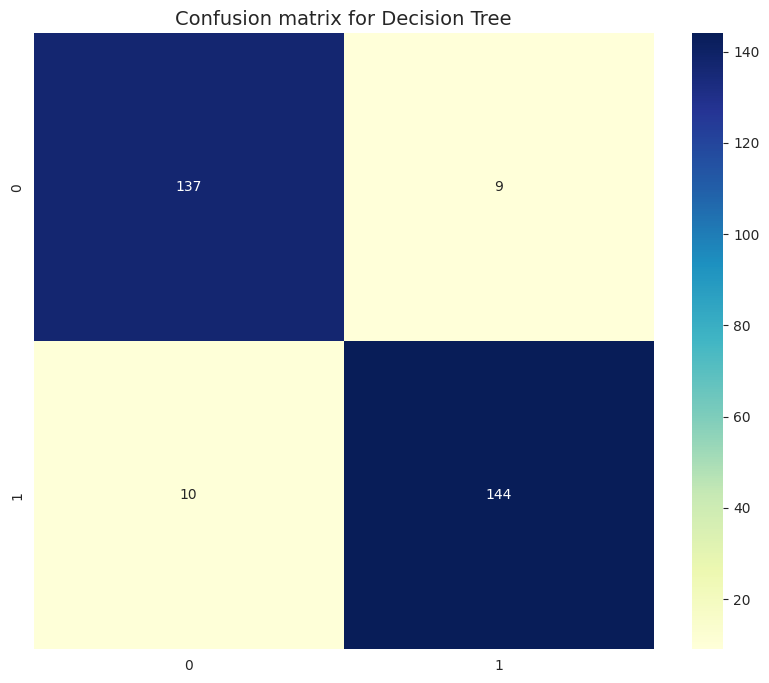

In [29]:
# Instantiate and train a DecisionTreeClassifier model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Print the accuracy on the training set
print("Train - Accuracy:", metrics.accuracy_score(y_train, dt.predict(X_train)))

# Make predictions using the Decision Tree model on the test set
y_pred_dt = dt.predict(X_test)

# Visualize the confusion matrix for Decision Tree predictions
fig = plt.figure(figsize=(10, 8))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='g', cmap="YlGnBu")
plt.title('Confusion matrix for Decision Tree', fontsize=14)


In [30]:
cr_dt = classification_report(y_test, y_pred_dt,target_names=['Not Clicked','Clicked'])
print(cr_dt)

              precision    recall  f1-score   support

 Not Clicked       0.93      0.94      0.94       146
     Clicked       0.94      0.94      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



## Ensemble

LogisticRegression, accuracy score = 0.8966666666666666
RandomForestClassifier, accuracy score = 0.95
DecisionTreeClassifier, accuracy score = 0.9366666666666666
VotingClassifier, accuracy score = 0.9533333333333334


Text(0.5, 1.0, 'Confusion matrix for VotingClassifier')

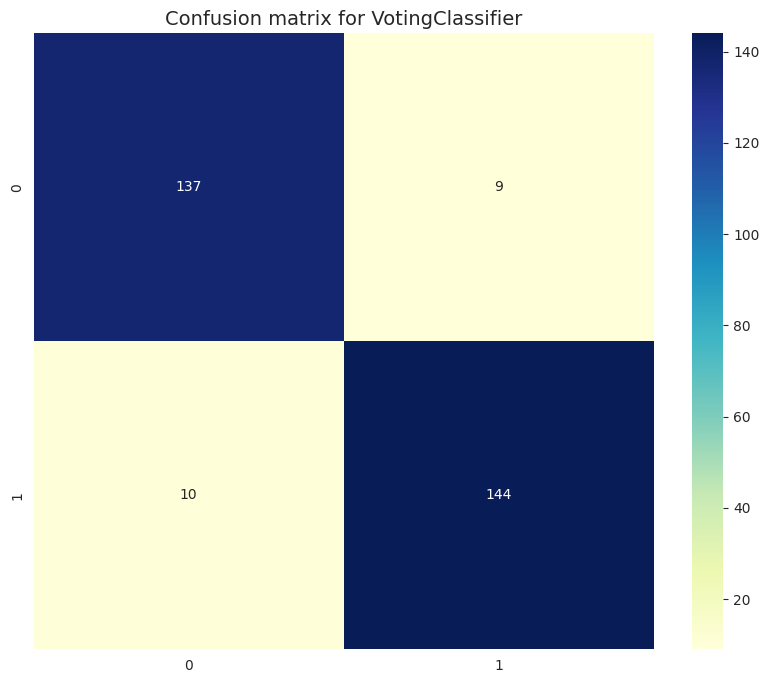

In [31]:
# Create a VotingClassifier ensemble comprising Logistic Regression, Random Forest, and Decision Tree
voting_clf = VotingClassifier([('lr', logistic),
                               ('rf', rf),
                               ('dt', dt)], voting='hard')

# Import necessary libraries
from sklearn.metrics import accuracy_score

# Evaluate and compare the accuracy of each classifier individually and the VotingClassifier
for clf in [logistic, rf, dt, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred_clf)}')

# Visualize the confusion matrix for the VotingClassifier predictions
fig = plt.figure(figsize=(10, 8))
cm_clf = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_clf, annot=True, fmt='g', cmap="YlGnBu")
plt.title('Confusion matrix for VotingClassifier', fontsize=14)


In [32]:
cr_clf = classification_report(y_test, y_pred_clf,target_names=['Not Clicked','Clicked'])
print(cr_clf)

              precision    recall  f1-score   support

 Not Clicked       0.93      0.97      0.95       146
     Clicked       0.97      0.94      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



# Conclusion

The results obtained from applying different algorithms to predict whether an internet user clicked on an advertisement. Here's an elaboration:

Three algorithms were employed for prediction:

- Logistic Regression achieved an accuracy score of 0.90. It performed reasonably well but had the lowest accuracy among the models tested.

- Random Forest Classifier exhibited the highest accuracy score of 0.96, indicating a strong predictive performance in discerning whether an internet user clicked on an ad.

- Decision Tree Classifier attained an accuracy score of 0.93, showcasing good predictive ability but slightly lower than Random Forest.

- Voting Classifier—an ensemble of the three models—yielded an accuracy score of 0.95. The ensemble approach showcased a significant improvement over Logistic Regression, demonstrating the effectiveness of combining multiple models to achieve better predictive performance.

The highest accuracy achieved by Random Forest underscores its suitability for this prediction task. While Logistic Regression had the lowest accuracy among the models individually, its inclusion in the ensemble contributed positively to the overall predictive capability of the Voting Classifier, which achieved a notably high accuracy score of 0.95. This consolidation of models often helps mitigate weaknesses of individual models and harnesses the collective strength of diverse algorithms for more robust predictions.





